In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)  # Mostrar todas las filas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.expand_frame_repr', False)  # Evitar cortar en varias líneas
pd.set_option('display.max_colwidth', None)  # Evitar cortar el contenido de las celdas

df = pd.read_csv('dataset_final.csv')

In [3]:
# 1. Columnas
columnas_numericas = ['Age', 'CK-MB_log', 'Troponin_log']
columna_objetivo = 'Result'

# 2. Separar X (predictoras) e y (objetivo)
X = df[columnas_numericas]
y = df[columna_objetivo]

# 3. Separar en train y test antes de escalar
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 4. Escalar solo las columnas numéricas del train
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[columnas_numericas])
X_test_num_scaled = scaler.transform(X_test[columnas_numericas])

# 5. Convertir a DataFrames con nombres de columnas
X_train_final = pd.DataFrame(X_train_num_scaled, columns=columnas_numericas, index=X_train.index)
X_test_final = pd.DataFrame(X_test_num_scaled, columns=columnas_numericas, index=X_test.index)

# Verificación opcional
print(X_train_final.head())
print(y_train.head())

           Age  CK-MB_log  Troponin_log
881  -0.159143   0.938751     -0.815166
723  -1.467989   0.096629     -1.053250
889   0.640708  -0.677957      1.316036
1004  1.149703  -0.968734     -0.273049
761  -0.086429  -0.804186      0.552234
881     1
723     0
889     1
1004    1
761     1
Name: Result, dtype: int64


Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       102
           1       0.98      0.98      0.98       162

    accuracy                           0.97       264
   macro avg       0.97      0.97      0.97       264
weighted avg       0.97      0.97      0.97       264

Accuracy: 0.9734848484848485


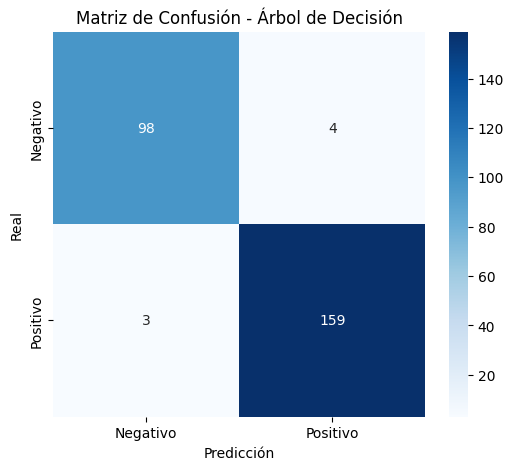

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Crear el modelo (puedes ajustar parámetros como max_depth, criterion, etc.)
modelo_arbol = DecisionTreeClassifier(random_state=42)

# 2. Entrenar
modelo_arbol.fit(X_train_final, y_train)

# 3. Predecir
y_pred_arbol = modelo_arbol.predict(X_test_final)

# 4. Evaluar
print("Árbol de Decisión:")
print(classification_report(y_test, y_pred_arbol))
accuracy = accuracy_score(y_test, y_pred_arbol)
print("Accuracy:", accuracy)

# 5. Matriz de Confusión
cm_arbol = confusion_matrix(y_test, y_pred_arbol)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_arbol, annot=True, fmt='g', cmap='Blues', xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


**Validación Cruzada**

In [8]:
from sklearn.model_selection import cross_val_score

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Evaluación con cross-validation (k=10)
scores = cross_val_score(modelo_arbol, X_train, y_train, cv=10, scoring="accuracy")
print('Accuracy:', accuracy)
print("Accuracy (Cross-Val):", scores.mean())

Accuracy: 0.9734848484848485
Accuracy (Cross-Val): 0.9810601976639713


**Exportar modelo**

In [9]:
import joblib
import os

ruta_modelo = os.path.join('modelos', 'modelo_arbol.pkl')
# guardar el modelo
joblib.dump(modelo_arbol, ruta_modelo)

['modelos\\modelo_arbol.pkl']